In [1]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

%matplotlib inline

# Loading the image

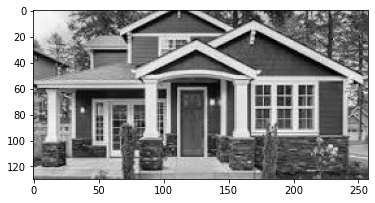

In [11]:
original_img = Image.open('images.jpg').convert('L')
original_img = np.array(original_img)
original_img = original_img/255.

plt.imshow(original_img, cmap='gray')

## Defining the filter

In [3]:
height, width = original_img.shape[:2]

# Horizontal line filter
fil = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])

# Translation

In [4]:
x = width/4  # No. of pixels to move along x-axis 
y = 0        # No. of pixels to move along y-axis

translate_matrix = np.float32([[1, 0, x], [0, 1, y]])

## Translation first, then convolution

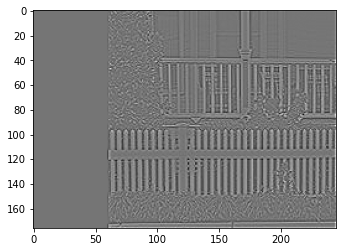

In [5]:
fmap1 = cv2.warpAffine(original_img, translate_matrix, (width, height))
fmap1 = convolve2d(fmap1,fil,mode='same')
plt.imshow(fmap1, cmap='gray')
plt.imsave('tc.jpg', fmap1, cmap='gray')

## Convolution first, then translation

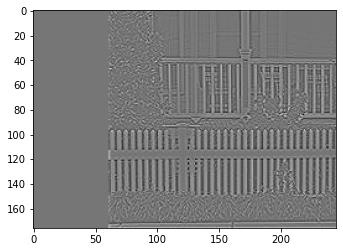

In [6]:
fmap2 = convolve2d(original_img,fil,mode='same')
fmap2 = cv2.warpAffine(fmap2, translate_matrix, (width, height))
plt.imshow(fmap2, cmap='gray')
plt.imsave('ct.jpg', fmap2, cmap='gray')

# Rotation

In [7]:
#center: center of rotation, angle: degree of rotation
center = (width/2, height/2)
rotate_matrix = cv2.getRotationMatrix2D(center=center, angle=90, scale=1)

## Rotation first, then convolution

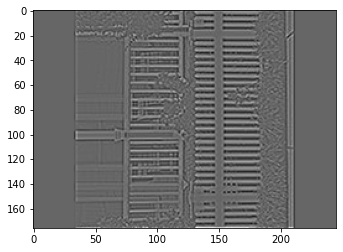

In [8]:
fmap3 = cv2.warpAffine(original_img, rotate_matrix, (width, height))
fmap3 = convolve2d(fmap3,fil,mode='same')
plt.imshow(fmap3, cmap='gray')
plt.imsave('rc.jpg', fmap3, cmap='gray')

## Convolution first, then rotation 

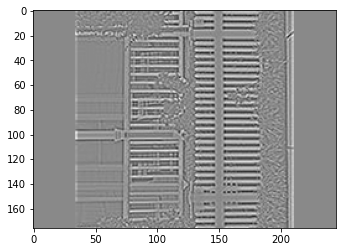

In [9]:
fmap4 = convolve2d(original_img,fil,mode='same')
fmap4 = cv2.warpAffine(fmap4, rotate_matrix, (width, height))
plt.imshow(fmap4, cmap='gray')
plt.imsave('cr.jpg', fmap4, cmap='gray')

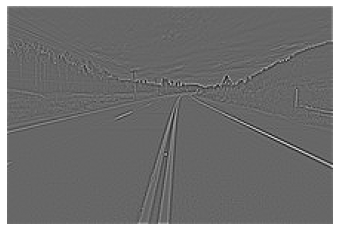

In [69]:
from scipy.signal import convolve2d
from matplotlib import pyplot as plt
import numpy as np
import cv2
from PIL import Image

%matplotlib inline


filename = 'Road'
original_img = Image.open('Line generation imgs/' + filename + '.jpg').convert('L')
original_img = np.array(original_img)
original_img = original_img/255
fil = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
fmap2 = convolve2d(original_img,fil,mode='same')
plt.axis('off')
plt.imshow(fmap2, cmap='gray')
plt.imsave('Line generation imgs/' + filename + 'output' + '.jpg', fmap2, cmap='gray')